### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [145]:
# print(df.describe())
# df.info()

#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [146]:
# Convert the 'Date/Time' column to datetime format
df["Date/Time"] = pd.to_datetime(df["Date/Time"])
# df

In [147]:
# Group by date and count the number of pickups
grouped_by_date = df.groupby(df["Date/Time"].dt.date).size()

# grouped_by_date

In [148]:
# Find the date with the highest number of pickups
result1 = grouped_by_date.idxmax()  # finding the max id count in a series

# print(result1)
# print(result2)

print("The date with the highest nos of pickups in the month of August-14 is :",result1)




The date with the highest nos of pickups in the month of August-14 is : 2014-08-07


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [149]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups


# Get the count of pickups on the highest date

print('The count of pickups on the highest date :', grouped_by_date.max())


The count of pickups on the highest date : 32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [150]:
# Count the number of unique TLC base companies

unique_values_count = df['Base'].nunique()
print("The number of unique TLC base companies is :", unique_values_count)


The number of unique TLC base companies is : 5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [151]:
# Group by TLC base company and count the number of pickups
grouped_by_TLC = df.groupby(df["Base"]).size()

result02 = df["Base"].value_counts().idxmax()  # same result
# print(result02)

# grouped_by_TLC



# Find the TLC base company with the highest number of pickups
result2 = grouped_by_TLC.idxmax()
print("The TLC base company with the highest number of pickups is :", result2)

The TLC base company with the highest number of pickups is : B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [152]:
# Group by TLC base company and count the number of pickups
df01 = df["Base"].value_counts().reset_index()
# df02 = df.groupby("Base").size().reset_index()
# print(df01.info())


print("The TLC base company and their respective number of pickups is as mentioned below :")
df01
# df02


The TLC base company and their respective number of pickups is as mentioned below :


,Base,count
0,B02617,355803
1,B02598,220129
2,B02682,173280
3,B02764,48591
4,B02512,31472


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [153]:
# Extract the hour from the 'Date/Time' column
Hour_data = df["Date/Time"].dt.hour.reset_index().drop("index", axis=1)


# Group by hour and count the number of pickups


# Find the hour with the highest number of pickups

higest_pickup_Hour = Hour_data["Date/Time"].value_counts().idxmax()
print("The hour with the highest number of pickups is :", higest_pickup_Hour)
pickup_by_hr = df.groupby(Hour_data["Date/Time"]).size()
no_of_pickups = pickup_by_hr.max()
# print("The number of pickups during the hour is :", no_of_pickups)

The hour with the highest number of pickups is : 17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

Text(0.5, 1.0, 'Line plot to visualize the number of pickups over time')

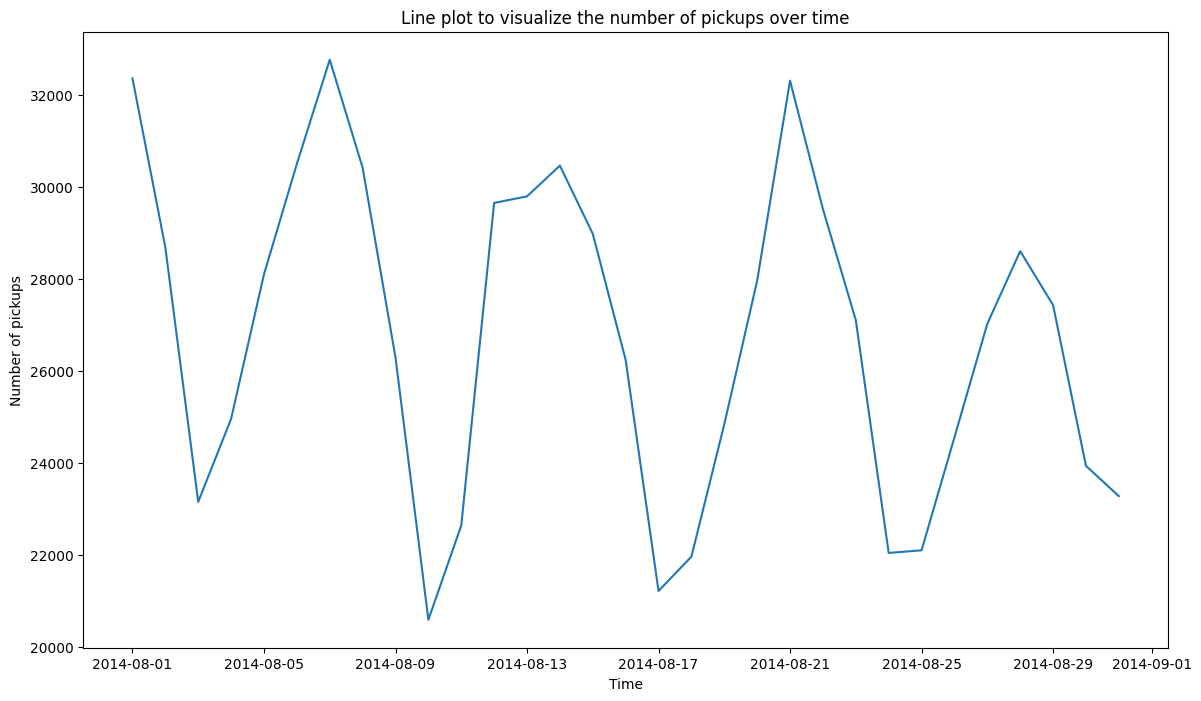

In [154]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
pickup_by_date1 = df.groupby(df["Date/Time"].dt.date).size()


# Create a line plot to visualize the number of pickups over time

ax = pickup_by_date1.plot(kind='line', figsize = (14,8))

ax.set_xlabel('Time')
ax.set_ylabel('Number of pickups')
ax.set_title('Line plot to visualize the number of pickups over time')
# ax.legend()

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

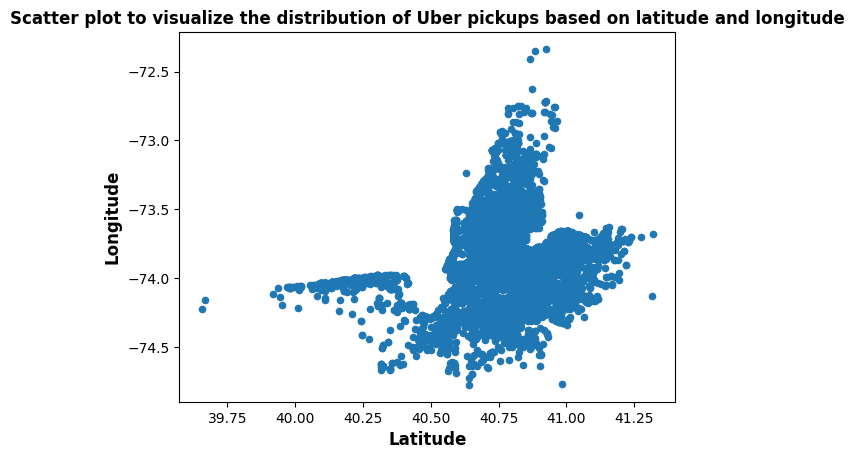

In [155]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
df.plot.scatter(x='Lat', y='Lon')
plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Longitude', fontsize=12, fontweight='bold')
plt.title('Scatter plot to visualize the distribution of Uber pickups based on latitude and longitude', fontsize=12, fontweight='bold')
plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

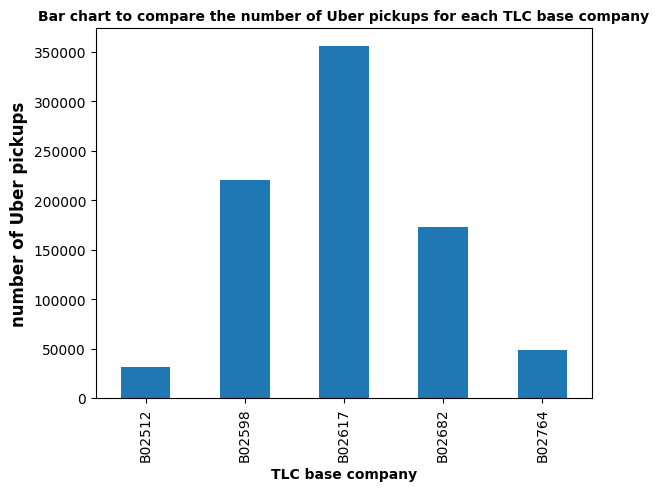

In [156]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
df01 = df.groupby("Base").size()

df01.plot(kind='bar')
plt.title("Bar chart to compare the number of Uber pickups for each TLC base company", fontsize=10, fontweight='bold')
plt.xlabel("TLC base company", fontsize=10, fontweight='bold')
plt.ylabel("number of Uber pickups", fontsize=12, fontweight='bold')
plt.show()

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

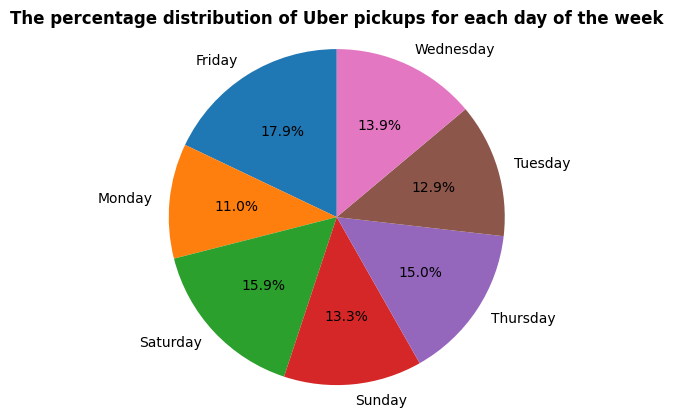

In [157]:
# Group by day of the week and count the number of pickups
pickups_by_day = df
pickups_by_day["Day Name"] = pickups_by_day["Date/Time"].dt.day_name()
pickups_by_day = pickups_by_day.groupby("Day Name").size()
# pickups_by_day

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
pickups_by_day.plot.pie(x = pickups_by_day, labels = pickups_by_day.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('The percentage distribution of Uber pickups for each day of the week', fontsize=12, fontweight='bold')
plt.show()